# **Classification Gender**

- Import Library

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

- Load Data

Information : 
- long_hair - Kolom ini berisi angka 0 dan 1, di mana 1 berarti "rambut panjang" dan 0 berarti "tidak rambut panjang".
- forehead_width_cm - Kolom ini dalam satuan CM. Ini adalah lebar dahi.
- forehead_height_cm - Ini adalah tinggi dahi dalam satuan CM.
- nose_wide - Kolom ini berisi angka 0 dan 1, di mana 1 berarti "hidung lebar" dan 0 berarti "hidung tidak lebar".
- nose_long - Kolom ini berisi angka 0 dan 1, di mana 1 berarti "hidung panjang" dan 0 berarti "hidung tidak panjang".
- lips_thin - Kolom ini berisi angka 0 dan 1, di mana 1 berarti "bibir tipis" dan 0 berarti "bibir tidak tipis".
- distance_nose_to_lip_long - Kolom ini berisi angka 0 dan 1, di mana 1 berarti "jarak antara hidung dan bibir panjang" dan 0 berarti "jarak pendek antara hidung dan bibir".
- gender - Ini berisi nilai "Laki-laki" atau "Perempuan".

In [21]:
df = pd.read_csv('../dataset/gender.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


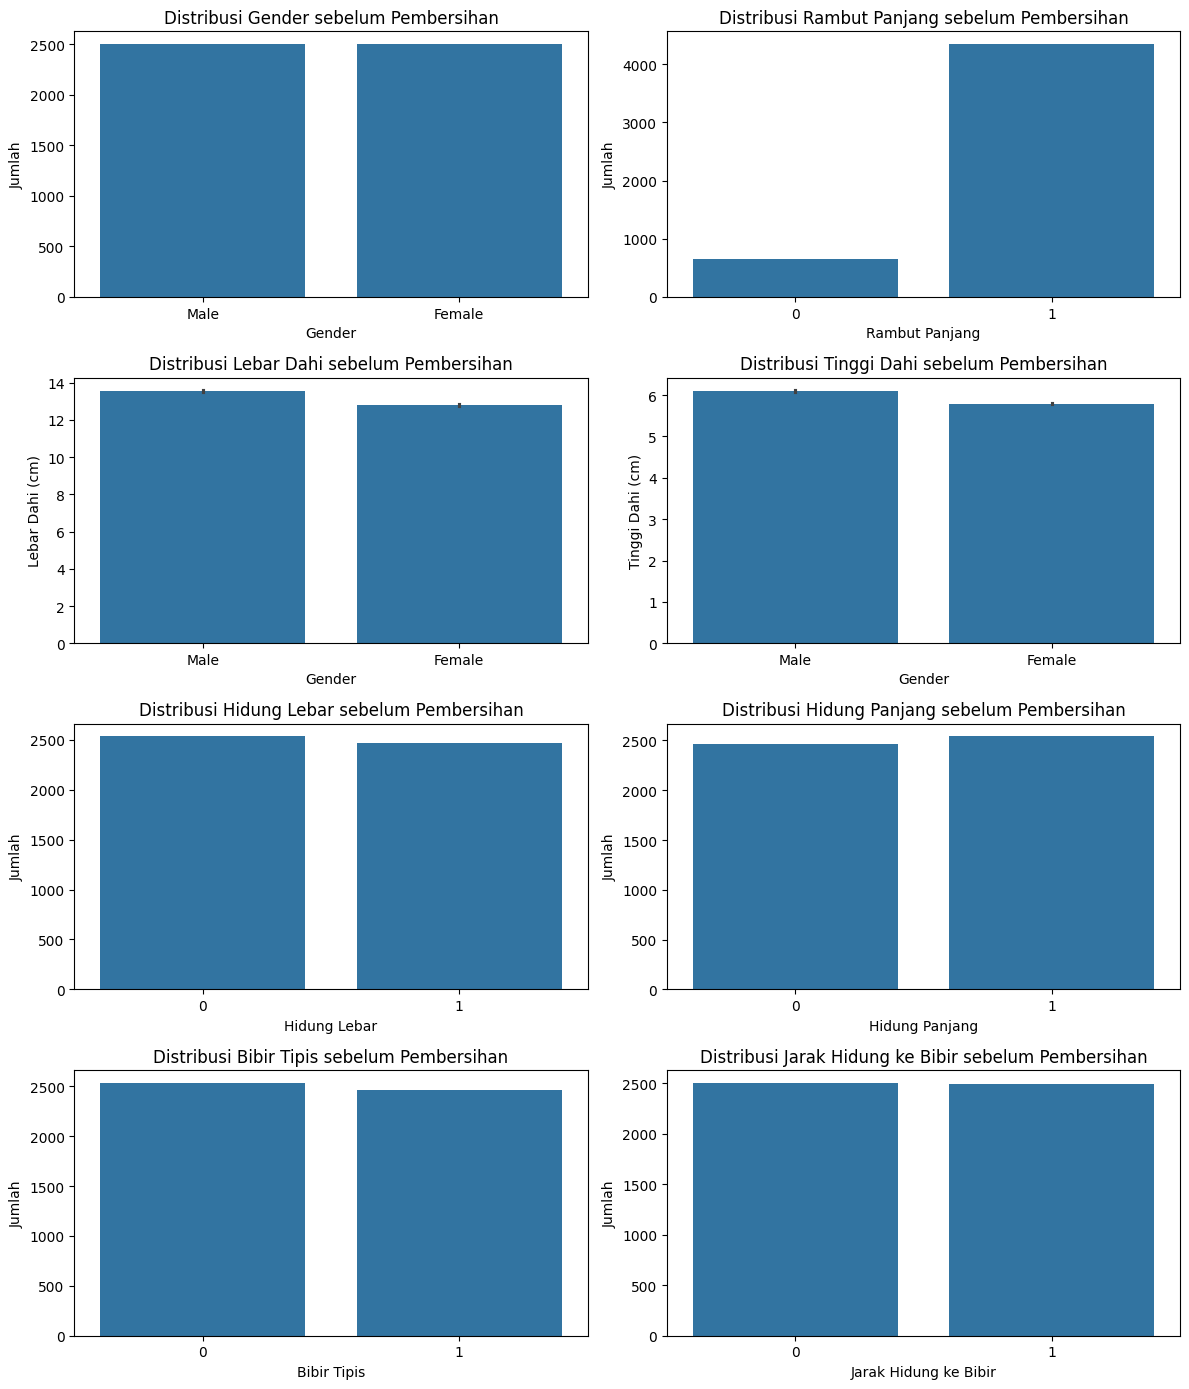

In [22]:
# Visual persebaran Gender sebelum di proses
plt.figure(figsize=(12, 14))

plt.subplot(4, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Distribusi Gender sebelum Pembersihan')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Grafik 2
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='long_hair')
plt.title('Distribusi Rambut Panjang sebelum Pembersihan')
plt.xlabel('Rambut Panjang')
plt.ylabel('Jumlah')

# Grafik 3
plt.subplot(4, 2, 3)
sns.barplot(data=df, x='gender', y='forehead_width_cm')
plt.title('Distribusi Lebar Dahi sebelum Pembersihan')
plt.xlabel('Gender')
plt.ylabel('Lebar Dahi (cm)')

# Grafik 4
plt.subplot(4, 2, 4)
sns.barplot(data=df, x='gender', y='forehead_height_cm')
plt.title('Distribusi Tinggi Dahi sebelum Pembersihan')
plt.xlabel('Gender')
plt.ylabel('Tinggi Dahi (cm)')

# Grafik 5
plt.subplot(4, 2, 5)
sns.countplot(data=df, x='nose_wide')
plt.title('Distribusi Hidung Lebar sebelum Pembersihan')
plt.xlabel('Hidung Lebar')
plt.ylabel('Jumlah')

# Grafik 6
plt.subplot(4, 2, 6)
sns.countplot(data=df, x='nose_long')
plt.title('Distribusi Hidung Panjang sebelum Pembersihan')
plt.xlabel('Hidung Panjang')
plt.ylabel('Jumlah')

# Grafik 7
plt.subplot(4, 2, 7)
sns.countplot(data=df, x='lips_thin')
plt.title('Distribusi Bibir Tipis sebelum Pembersihan')
plt.xlabel('Bibir Tipis')
plt.ylabel('Jumlah')

# Grafik 8
plt.subplot(4, 2, 8)
sns.countplot(data=df, x='distance_nose_to_lip_long')
plt.title('Distribusi Jarak Hidung ke Bibir sebelum Pembersihan')
plt.xlabel('Jarak Hidung ke Bibir')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [23]:
# Menampilkan info terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [24]:
# Memberikan info terkait tipe data pada tiap kolom
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

- Handiling Missing & Duplicates Values

In [25]:
# Cek missing values
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [26]:
# Cek duplicate values
df.duplicated().sum()

np.int64(1768)

In [27]:
# Menghapus duplicate values
df = df.drop_duplicates()

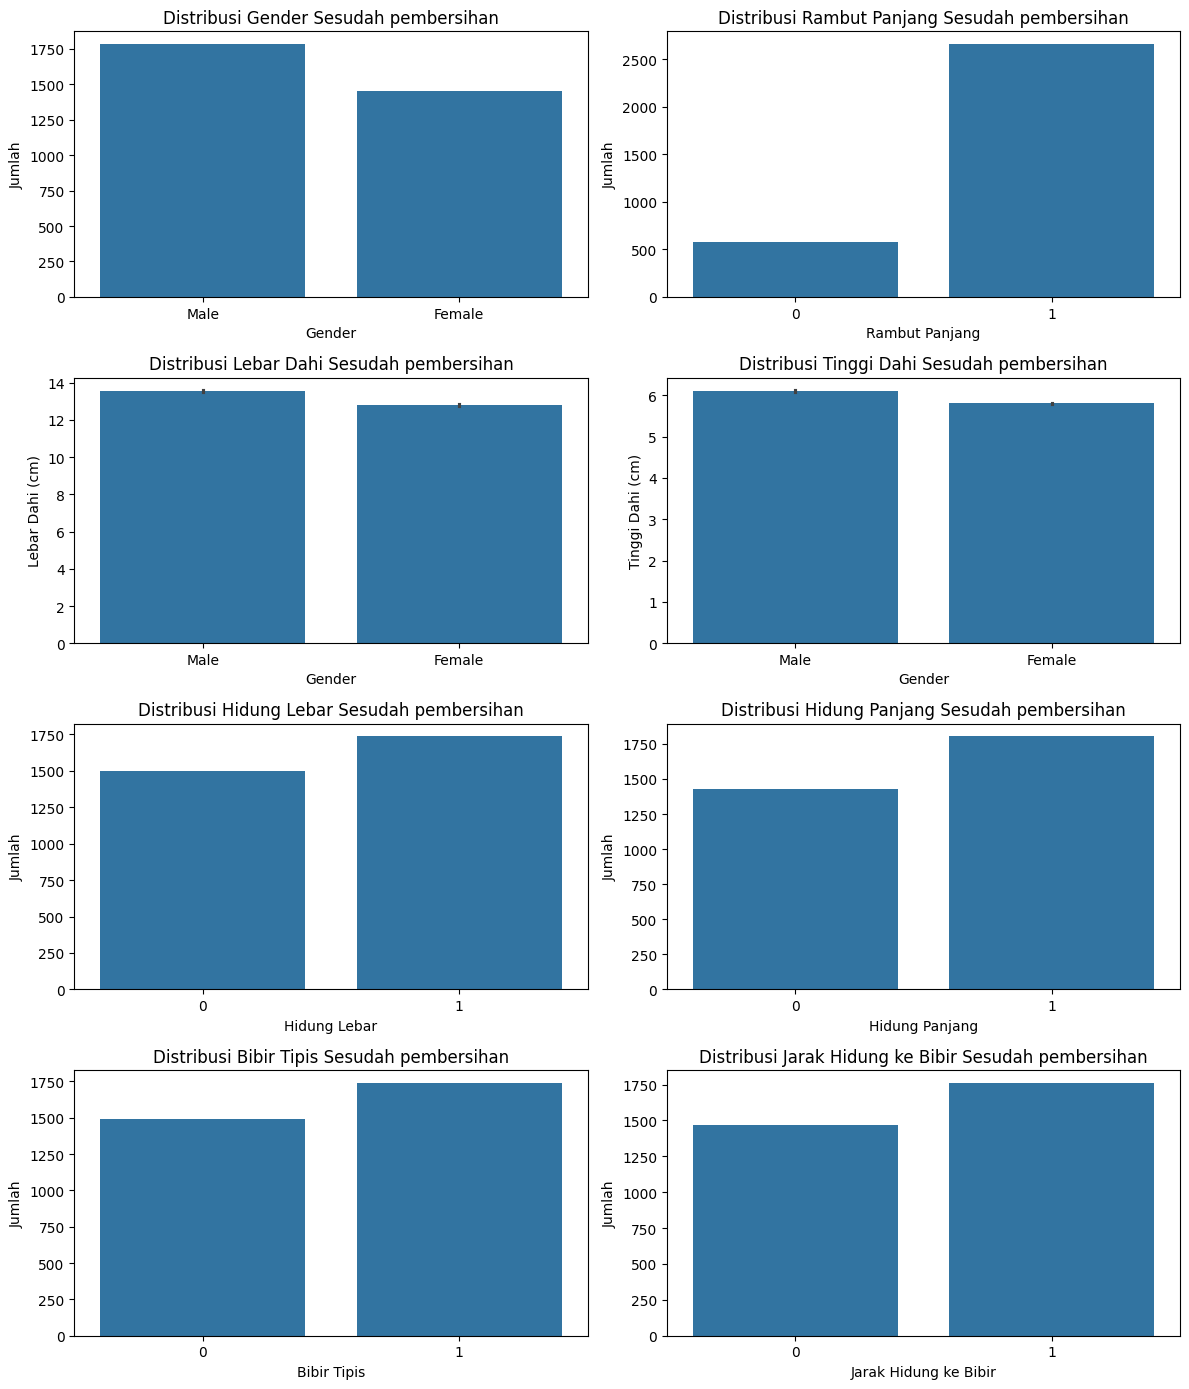

In [28]:
# Visual persebaran Gender sesudah di proses
plt.figure(figsize=(12, 14))

plt.subplot(4, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Distribusi Gender Sesudah pembersihan')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Grafik 2
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='long_hair')
plt.title('Distribusi Rambut Panjang Sesudah pembersihan')
plt.xlabel('Rambut Panjang')
plt.ylabel('Jumlah')

# Grafik 3
plt.subplot(4, 2, 3)
sns.barplot(data=df, x='gender', y='forehead_width_cm')
plt.title('Distribusi Lebar Dahi Sesudah pembersihan')
plt.xlabel('Gender')
plt.ylabel('Lebar Dahi (cm)')

# Grafik 4
plt.subplot(4, 2, 4)
sns.barplot(data=df, x='gender', y='forehead_height_cm')
plt.title('Distribusi Tinggi Dahi Sesudah pembersihan')
plt.xlabel('Gender')
plt.ylabel('Tinggi Dahi (cm)')

# Grafik 5
plt.subplot(4, 2, 5)
sns.countplot(data=df, x='nose_wide')
plt.title('Distribusi Hidung Lebar Sesudah pembersihan')
plt.xlabel('Hidung Lebar')
plt.ylabel('Jumlah')

# Grafik 6
plt.subplot(4, 2, 6)
sns.countplot(data=df, x='nose_long')
plt.title('Distribusi Hidung Panjang Sesudah pembersihan')
plt.xlabel('Hidung Panjang')
plt.ylabel('Jumlah')

# Grafik 7
plt.subplot(4, 2, 7)
sns.countplot(data=df, x='lips_thin')
plt.title('Distribusi Bibir Tipis Sesudah pembersihan')
plt.xlabel('Bibir Tipis')
plt.ylabel('Jumlah')

# Grafik 8
plt.subplot(4, 2, 8)
sns.countplot(data=df, x='distance_nose_to_lip_long')
plt.title('Distribusi Jarak Hidung ke Bibir Sesudah pembersihan')
plt.xlabel('Jarak Hidung ke Bibir')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [29]:
# Mengubah fitur gender yang sebelumnya kategorikal menjadi numerical 
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender']) # 0 = Female, 1 =  Male

In [ ]:
df.head()

- Data Splitting

Information :
- Target : gender
- Feature : long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long

In [30]:
# Melakukan holdout splitting menggunakan train_test_split dengan ratio train:test = 80:20
X = df.drop('gender', axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Melakukan normalisasi/standarisasi untuk penggunaan di algoritma tertentu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
X_train_scaled

array([[ 0.4688404 , -0.9917499 , -0.85234516, ...,  0.88721239,
         0.91611152, -1.10960976],
       [ 0.4688404 ,  0.5275486 , -1.39788544, ...,  0.88721239,
        -1.09157016, -1.10960976],
       [ 0.4688404 , -0.9917499 , -1.03419192, ..., -1.12712583,
         0.91611152,  0.90121774],
       ...,
       [ 0.4688404 ,  0.3488076 , -0.85234516, ..., -1.12712583,
        -1.09157016,  0.90121774],
       [ 0.4688404 ,  0.0806961 ,  0.05688864, ..., -1.12712583,
        -1.09157016, -1.10960976],
       [-2.13292199,  1.95747661,  0.78427569, ..., -1.12712583,
         0.91611152,  0.90121774]], shape=(2586, 7))

In [33]:
X_test_scaled

array([[-2.23399658, -0.22410976, -0.82978357, ..., -1.10605954,
         0.96506128, -1.03941611],
       [ 0.44762826,  0.22929554, -1.01202049, ...,  0.90411046,
         0.96506128, -1.03941611],
       [ 0.44762826, -0.04274764, -0.46530973, ..., -1.10605954,
        -1.03620362, -1.03941611],
       ...,
       [-2.23399658, -0.31479083, -0.46530973, ..., -1.10605954,
        -1.03620362, -1.03941611],
       [ 0.44762826, -0.40547189,  0.81034872, ...,  0.90411046,
         0.96506128, -1.03941611],
       [ 0.44762826,  1.95223571, -0.28307281, ...,  0.90411046,
         0.96506128,  0.9620786 ]], shape=(647, 7))

## Modeling & Evaluation

In [34]:
def plot_conf_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- SVM

Akurasi : 0.9582689335394127
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       308
           1       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



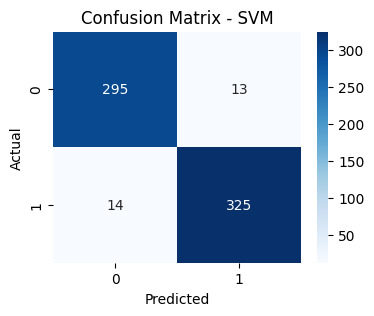

In [35]:
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

y_pred_svm = model_svm.predict(X_test_scaled)
print("Akurasi :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
# Contoh untuk SVM
plot_conf_matrix("SVM", y_test, y_pred_svm)

- Decision Tree

Akurasi :  0.9489953632148377
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       308
           1       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



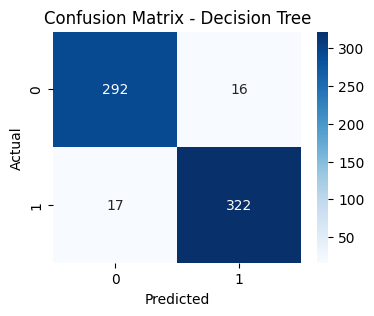

In [36]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test) 
print("Akurasi : ", accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test, y_pred_tree))
# Untuk Decision Tree
plot_conf_matrix("Decision Tree", y_test, y_pred_tree)

- K Nearest Neighbor

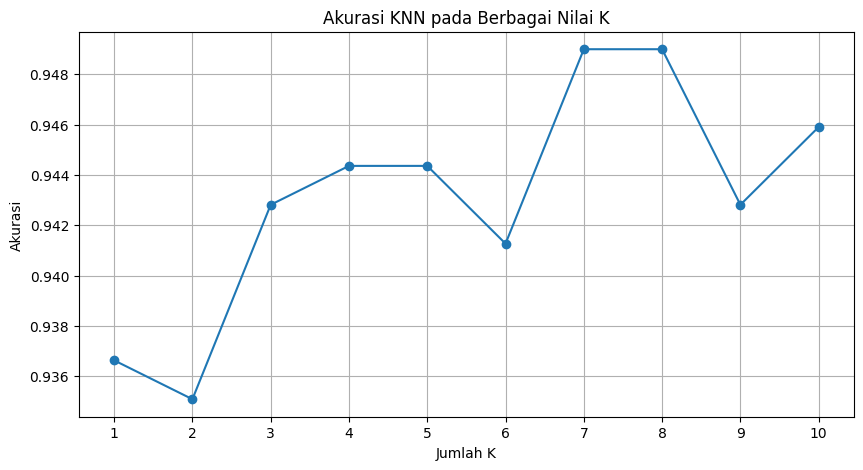

Nilai k terbaik: 7 dengan akurasi 0.95
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       308
           1       0.98      0.92      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



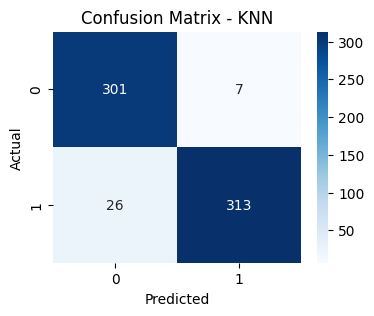

In [37]:
# Menentukan K terbaik dari range 1-10 untuk KNN
k_values = list(range(1,11))
acc = []
best_model = None
best_pred = None
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_scaled, y_train)
    y_pred_knn = model_knn.predict(X_test_scaled)
    accu = accuracy_score(y_test, y_pred_knn)
    acc.append(accu)

    if accu == max(acc):
        best_model  = model_knn
        best_pred = y_pred_knn

plt.figure(figsize=(10,5))
plt.plot(k_values, acc, marker='o')
plt.title("Akurasi KNN pada Berbagai Nilai K")
plt.xlabel("Jumlah K")
plt.ylabel("Akurasi")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[acc.index(max(acc))]
print(f"Nilai k terbaik: {best_k} dengan akurasi {max(acc):.2f}")
print(classification_report(y_test, best_pred))
# Untuk KNN
plot_conf_matrix("KNN", y_test, best_pred)


## Testing

Insight :
- Dari ketiga algorithm yang digunakan untuk akurasi yang paling baik ialah SVM
- Dari ketiga algorithm yang diguakan ketiga ketiganya menunjukkan hasil klasifikasi bahwa data yang ada di sample yaitu Perempuan

In [38]:
# Testing dengan input manual (simulasi real use case)
sample = pd.DataFrame([[1, 13.0, 5.8, 0, 0, 1, 0]], columns=X.columns)
sample_scaled = scaler.transform(sample)


# Uji dengan semua model
print("Prediksi SVM:", model_svm.predict(sample_scaled)[0])
print("Prediksi KNN:", model_knn.predict(sample_scaled)[0])
print("Prediksi Decision Tree:", model_tree.predict(sample)[0])

Prediksi SVM: 0
Prediksi KNN: 0
Prediksi Decision Tree: 0
